In [1]:
%pylab inline
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import pandas as pd
import mdtraj as md
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from MDAnalysis.lib.distances import calc_angles
from MDAnalysis.lib.distances import calc_bonds
from glob import glob
import numpy as np
import pyemma.coordinates as coor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

trajfile1 = '/home/dldx/gromacs/R-H/new-R_bound/equilibrium_combine.xtc'
topfile1 = '/home/dldx/gromacs/R-H/new-R_bound/r2_bound.pdb'

trajfile2 = '/home/dldx/gromacs/R-H/new-H_bound/equilibrium_combine.xtc'
topfile2 = '/home/dldx/gromacs/R-H/new-H_bound/H-bound.pdb'

trajfile3 = '/home/dldx/gromacs/R-H/new-R_unbound/equilibrium_combine.xtc'
topfile3 = '/home/dldx/gromacs/R-H/new-R_unbound/r2_unbound.pdb'

trajfile4 = '/home/dldx/gromacs/R-H/new-H_unbound/equilibrium_combine.xtc'
topfile4 = '/home/dldx/gromacs/R-H/new-H_unbound/H-unbound.pdb'

# R ca 
trajfile5 = '/home/dldx/gromacs/R-H/R/ca/combine_ca.xtc'
topfile5 = '/home/dldx/gromacs/R-H/new-R_unbound/new_R-unbound.pdb'

# H ca 
trajfile6 = '/home/dldx/gromacs/R-H/H/ca/combine_ca.xtc'
topfile6 = '/home/dldx/gromacs/R-H/new-H_unbound/new_H-unbound.pdb'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def compute_center_of_mass(traj,atom_indices=None):
    if atom_indices==None:
        atoms = traj.top.atoms
        coords = traj.xyz
    else:
        atoms = [traj.top.atom(i) for i in atom_indices]
        coords = np.take(traj.xyz, atom_indices, axis=1)
    com = np.zeros((traj.n_frames, 3))
    masses = np.array([a.element.mass for a in atoms])
    masses /= masses.sum()
    for i, x in enumerate(coords):
        com[i, :] = x.astype('float64').T.dot(masses)
    return com

In [3]:
def angle(trajfile,topfile,list1,list2,list3):
    top_h = md.load(topfile) 
    traj = md.load(trajfile, top=top_h)
    mass1 = compute_center_of_mass(traj,list1).astype(np.float32)
    mass2 = compute_center_of_mass(traj,list2).astype(np.float32)
    mass3 = compute_center_of_mass(traj,list3).astype(np.float32)
    angle_list = []
    angles = calc_angles(mass1,mass2,mass3)
    angle_list.append(angles)
    return  angle_list

In [4]:
# R_open mdtraj FEL
# v1/v2(LNC - YRL)  98-168  原子781-1332    
# v3(PNN - RQA)   274-303   原子2129-2357
# β20 -β21(QII-AMY) 398-411   
# α1(NMV-QSL) 68-85 

list1 = []
list2 = []
list3 = [] 
for i in range(98,169):
    list1.append(i)
for j in range(398,412):
    list2.append(j)
for k in range(68,86):
    list3.append(k)
    
top_h = md.load(topfile1)
traj = md.load(trajfile1,  top=top_h)
top_h_bb = top_h.topology.select('backbone')
rmsd1 = md.rmsd(traj, top_h, atom_indices=top_h_bb)

x_angle1 = angle(trajfile1,topfile1,list1,list2,list3)
y_rmsd1 = rmsd1

In [20]:
print(x_rmsd1)
print(y_angle1[0])
x_rmsd11=np.array(x_rmsd1)
y_angle11=np.array(y_angle1)
# print(x_rmsd1)
# print(y_angle1[0])

[0.06831329 0.11893219 0.14842764 ... 0.97836    0.9885861  1.0020683 ]
[1.01302503 1.01435267 1.02863778 ... 1.32107364 1.36884844 1.29177588]


In [4]:
# H_open mdtraj FEL
# v1/v2(LNC - YRL)  98-168  原子791-1361    
# v3(PNN - RQA)   274-303   原子2153-2380
# β20 -β21 (QIV-AMY) 391-404     
# α1 (DMV-QSL) 68-85   
list1 = []
list2 = []
list3 = [] 

for i in range(98,169):
    list1.append(i)
for j in range(391,405):
    list2.append(j)
for k in range(68,86):
    list3.append(k)
    
top_h = md.load(topfile2)
traj = md.load(trajfile2,  top=top_h)
top_h_bb = top_h.topology.select('backbone')
rmsd2 = md.rmsd(traj, top_h, atom_indices=top_h_bb)

x_angle2 = angle(trajfile2,topfile2,list1,list2,list3)
y_rmsd2 = rmsd2

In [4]:
# R_close mdtraj FEL
# v1/v2(LNC - YRL)  98-168  原子781-1332    
# v3(PNN - RQA)   274-303   原子2129-2357
# β20 -β21(QII-AMY) 398-411   
# α1(NMV-QSL) 68-85 

list1 = []
list2 = []
list3 = [] 
for i in range(98,169):
    list1.append(i)
for j in range(398,412):
    list2.append(j)
for k in range(68,86):
    list3.append(k)
    
top_h = md.load(topfile3)
traj = md.load(trajfile3,  top=top_h)
top_h_bb = top_h.topology.select('backbone')
rmsd3 = md.rmsd(traj, top_h, atom_indices=top_h_bb)
  
x_angle3 = angle(trajfile3,topfile3,list1,list2,list3)
y_rmsd3 = rmsd3

In [4]:
# H_close mdtraj FEL
# v1/v2(LNC - YRL)  98-168  原子791-1361    
# v3(PNN - RQA)   274-303   原子2153-2380
# β20 -β21 (QIV-AMY) 391-404     
# α1 (DMV-QSL) 68-85  
list1 = []
list2 = []
list3 = [] 

for i in range(98,169):
    list1.append(i)
for j in range(391,405):
    list2.append(j)
for k in range(68,86):
    list3.append(k)
    
top_h = md.load(topfile4)
traj = md.load(trajfile4,  top=top_h)
top_h_bb = top_h.topology.select('backbone')
rmsd4 = md.rmsd(traj, top_h, atom_indices=top_h_bb)

x_angle4 = angle(trajfile4,topfile4,list1,list2,list3)
y_rmsd4 = rmsd4

In [12]:
# R mdtraj FEL
# v1/v2(LNC - YRL)  98-168  原子781-1332    
# v3(PNN - RQA)   274-303   原子2129-2357
# β20 -β21(QII-AMY) 398-411   
# α1(NMV-QSL) 68-85 

list1 = []
list2 = []
list3 = [] 
for i in range(98,169):
    list1.append(i)
for j in range(398,412):
    list2.append(j)
for k in range(68,86):
    list3.append(k)
    
top_h = md.load(topfile5)
traj = md.load(trajfile5,  top=top_h)
top_h_bb = top_h.topology.select('backbone')
rmsd5 = md.rmsd(traj, top_h, atom_indices=top_h_bb)

x_angle5 = angle(trajfile5,topfile5,list1,list2,list3)
y_rmsd5 = rmsd5

In [13]:
# H mdtraj FEL
# v1/v2(LNC - YRL)  98-168  原子791-1361    
# v3(PNN - RQA)   274-303   原子2153-2380
# β20 -β21 (QIV-AMY) 391-404     
# α1 (DMV-QSL) 68-85  
list1 = []
list2 = []
list3 = [] 

for i in range(98,169):
    list1.append(i)
for j in range(391,405):
    list2.append(j)
for k in range(68,86):
    list3.append(k)
    
top_h = md.load(topfile6)
traj = md.load(trajfile6,  top=top_h)
top_h_bb = top_h.topology.select('backbone')
rmsd6 = md.rmsd(traj, top_h, atom_indices=top_h_bb)

x_angle6 = angle(trajfile6,topfile6,list1,list2,list3)
y_rmsd6 = rmsd6

<ipython-input-21-c69ac6e438c5>:4: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


Text(0, 0.5, 'Angle (rad)')

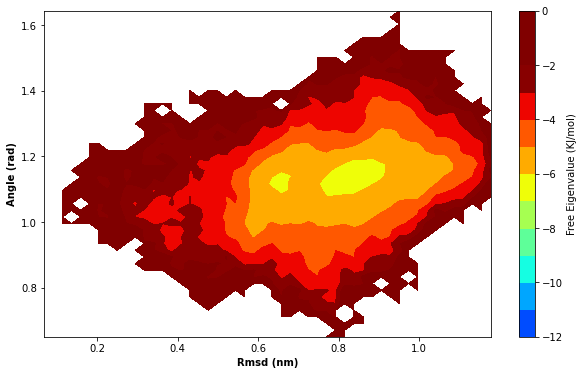

In [21]:
# histogram data
z,x,y = np.histogram2d(y_rmsd1,x_angle1[0],bins=50)
# compute free energies
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
# contour plot
colors = [(cm.jet(i)) for i in range(40,310)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=300)
contourf(F.T, 15, cmap=cmap, levels=[i for i in range(-12,0,1)]+[0],extent=extent)
font={'size':13,
     'family':'Times New Roman',
     'weight':'bold',}
clb = colorbar()
clb.set_label('Free Eigenvalue (KJ/mol)')
xlabel('Rmsd (nm)',family='times new roman',weight='bold')

ylabel('Angle (rad)',family='times new roman',weight='bold')
# savefig('H_FEL.jpg',dpi=600,bbox_inches='tight')

<ipython-input-5-395e660e7c2b>:6: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


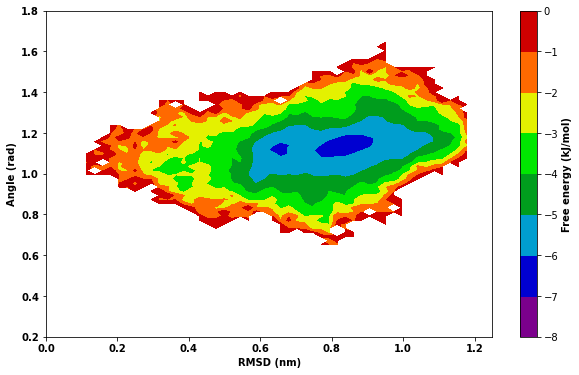

In [5]:
# histogram data
figure(figsize(10,6))
z,x,y = np.histogram2d(y_rmsd1,x_angle1[0], bins=50)

# F = -2.5*np.log(z)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-8,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("nipy_spectral"),levels=levels,extent=extent)

xlim(0.0,1.25)
ylim(0.2,1.8)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
clb = colorbar()
clb.set_label('Free energy (kJ/mol)',weight='bold')
xlabel('RMSD (nm)',weight='bold')
ylabel('Angle (rad)',weight='bold')
savefig('R-open_FEL.jpg',dpi=600,bbox_inches='tight')

<ipython-input-6-c49fe9c6e470>:5: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


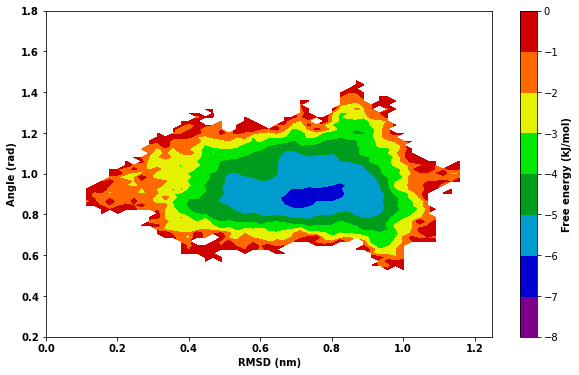

In [6]:
# histogram data
figure(figsize(10,6))
z,x,y = np.histogram2d(y_rmsd2,x_angle2[0], bins=50)

F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-8,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("nipy_spectral"),levels=levels,extent=extent)

xlim(0.0,1.25)
ylim(0.2,1.8)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
clb = colorbar()
clb.set_label('Free energy (kJ/mol)',weight='bold')
xlabel('RMSD (nm)',weight='bold')
ylabel('Angle (rad)',weight='bold')
savefig('H-open_FEL.jpg',dpi=600,bbox_inches='tight')

<ipython-input-5-c52f46bfe7b1>:6: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


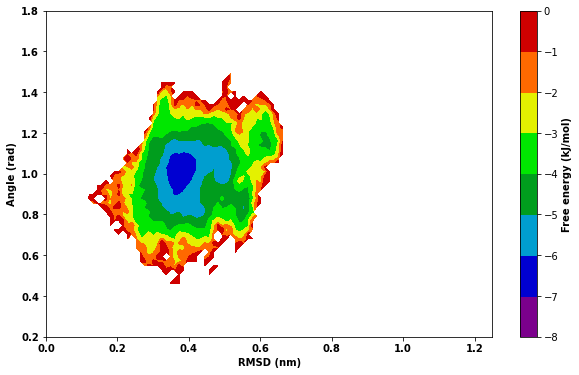

In [5]:
# histogram data
figure(figsize(10,6))
z,x,y = np.histogram2d(y_rmsd3,x_angle3[0], bins=50)

# F = -2.5*np.log(z)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-8,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("nipy_spectral"),levels=levels,extent=extent)

xlim(0.0,1.25)
ylim(0.2,1.8)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
clb = colorbar()
clb.set_label('Free energy (kJ/mol)',weight='bold')
xlabel('RMSD (nm)',weight='bold')
ylabel('Angle (rad)',weight='bold')
savefig('R-close_FEL.jpg',dpi=600,bbox_inches='tight')

<ipython-input-5-1702467fcb98>:6: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


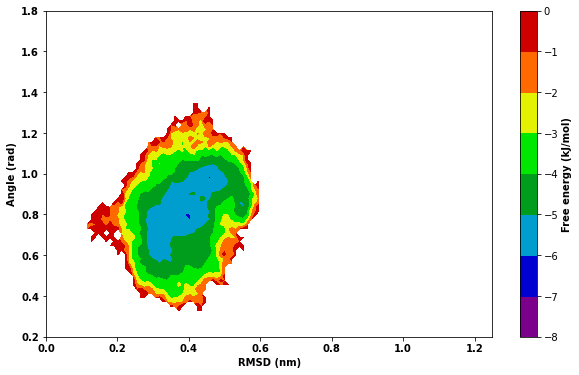

In [5]:
# histogram data
figure(figsize(10,6))
z,x,y = np.histogram2d(y_rmsd4,x_angle4[0], bins=50)

# F = -2.5*np.log(z)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-8,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("nipy_spectral"),levels=levels,extent=extent)

xlim(0.0,1.25)
ylim(0.2,1.8)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
clb = colorbar()
clb.set_label('Free energy (kJ/mol)',weight='bold')
xlabel('RMSD (nm)',weight='bold')
ylabel('Angle (rad)',weight='bold')
savefig('H-close_FEL.jpg',dpi=600,bbox_inches='tight')

<ipython-input-50-e81ea3d640a2>:6: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


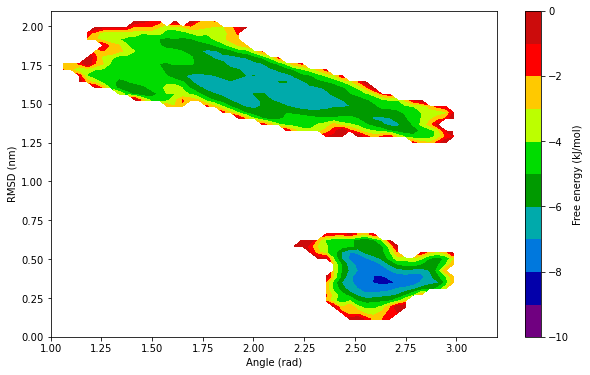

In [50]:
# histogram data
figure(figsize(10,6))
z,x,y = np.histogram2d(x_angle5[0],y_rmsd5, bins=50)

# F = -2.5*np.log(z)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-10,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("nipy_spectral"),levels=levels,extent=extent)

clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('Angle (rad)')
ylabel('RMSD (nm)')
xlim(1.0,3.2)
ylim(0.0,2.1)
savefig('R_FEL.jpg',dpi=600,bbox_inches='tight')

<ipython-input-51-daf63611eb11>:6: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


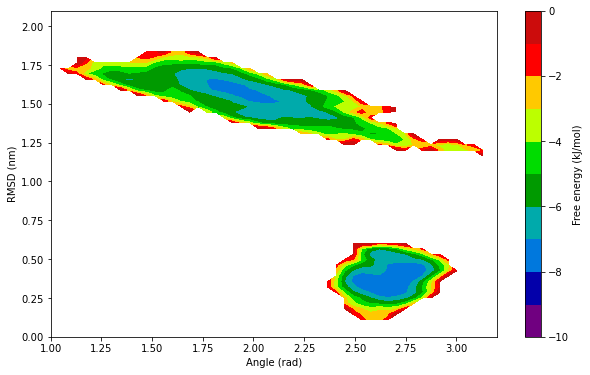

In [51]:
# histogram data
figure(figsize(10,6))
z,x,y = np.histogram2d(x_angle6[0],y_rmsd6, bins=50)

# F = -2.5*np.log(z)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-10,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("nipy_spectral"),levels=levels,extent=extent)

clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('Angle (rad)')
ylabel('RMSD (nm)')
xlim(1.0,3.2)
ylim(0.0,2.1)
savefig('H_FEL.jpg',dpi=600,bbox_inches='tight')